<a href="https://colab.research.google.com/github/amandadevynaa/Google-Colab/blob/main/dataset_Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [96]:
# Import library
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk model regresi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso


# **Preprossesing dataset**

Dataset yang digunakan dalam penelitian ini adalah Heart Disease Dataset yang diambil dari UCI Machine Learning Repository. Dataset ini terdiri dari 303 data individu dengan 14 variabel klinis yang berkaitan dengan kemungkinan terjadinya penyakit jantung.

In [97]:
# ID file yang benar (dari Google Drive)
file_id = "1OFKVIYEwJutMBgwbDEW6p3UCz0kjquZW"

# URL unduhan langsung dari Google Drive
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
output = "heart.csv"
df.to_csv(output, index=False)

df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [98]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [120]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,age_trestbps,log_chol
count,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02
mean,153.872910,1.158494e-16,-5.940993e-17,246.785953,1.307018e-16,1.058528,0.672241,0.946488,1.158494e-16,3.831940e-16
std,95.896287,1.001676e+00,1.001676e+00,52.532582,1.001676e+00,1.162769,0.937438,1.230409,1.001676e+00,1.001676e+00
min,1.000000,-2.830983e+00,-2.128661e+00,100.000000,-3.393403e+00,0.000000,0.000000,0.000000,-2.041270e+00,-4.199583e+00
25%,75.500000,-7.234199e-01,-6.612308e-01,211.000000,-7.290310e-01,0.000000,0.000000,0.000000,-7.549710e-01,-6.441737e-01
50%,151.000000,1.639752e-01,-9.683454e-02,242.000000,1.157698e-01,0.800000,0.000000,0.000000,-4.991398e-02,1.023966e-02
75%,227.500000,7.185971e-01,4.675617e-01,275.500000,7.006319e-01,1.600000,1.000000,2.000000,6.723395e-01,6.295172e-01
max,749.000000,2.493387e+00,3.853939e+00,564.000000,2.281926e+00,6.200000,3.000000,4.000000,2.873493e+00,4.056182e+00


In [99]:
missing_value = df.isnull().sum()
print(f"Jumlah missing value di seluruh kolom: \n{missing_value}")

Jumlah missing value di seluruh kolom: 
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [100]:
# Hapus semua baris yang punya nilai kosong
df = df.dropna()

# Reset index setelah dihapus
df.reset_index(drop=True, inplace=True)
print("\nMissing value setelah dihapus:")
print(df.isna().sum())



Missing value setelah dihapus:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [101]:
# Mengecek baris yang duplikat di seluruh kolom
duplicate_rows = df.duplicated()

# Menghitung jumlah baris yang duplikat
num_duplicate_rows = duplicate_rows.sum()

print(f"Jumlah baris duplikat di seluruh kolom: {num_duplicate_rows}")

Jumlah baris duplikat di seluruh kolom: 0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        299 non-null    int64  
 1   age                       299 non-null    float64
 2   dataset                   299 non-null    object 
 3   trestbps                  299 non-null    float64
 4   chol                      299 non-null    float64
 5   fbs                       299 non-null    object 
 6   thalch                    299 non-null    float64
 7   exang                     299 non-null    object 
 8   oldpeak                   299 non-null    float64
 9   slope                     299 non-null    object 
 10  ca                        299 non-null    float64
 11  thal                      299 non-null    object 
 12  num                       299 non-null    int64  
 13  age_trestbps              299 non-null    float64
 14  log_chol  

In [124]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,age_trestbps,log_chol
count,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02
mean,153.872910,1.158494e-16,-5.940993e-17,246.785953,1.307018e-16,1.058528,0.672241,0.946488,1.158494e-16,3.831940e-16
std,95.896287,1.001676e+00,1.001676e+00,52.532582,1.001676e+00,1.162769,0.937438,1.230409,1.001676e+00,1.001676e+00
min,1.000000,-2.830983e+00,-2.128661e+00,100.000000,-3.393403e+00,0.000000,0.000000,0.000000,-2.041270e+00,-4.199583e+00
25%,75.500000,-7.234199e-01,-6.612308e-01,211.000000,-7.290310e-01,0.000000,0.000000,0.000000,-7.549710e-01,-6.441737e-01
50%,151.000000,1.639752e-01,-9.683454e-02,242.000000,1.157698e-01,0.800000,0.000000,0.000000,-4.991398e-02,1.023966e-02
75%,227.500000,7.185971e-01,4.675617e-01,275.500000,7.006319e-01,1.600000,1.000000,2.000000,6.723395e-01,6.295172e-01
max,749.000000,2.493387e+00,3.853939e+00,564.000000,2.281926e+00,6.200000,3.000000,4.000000,2.873493e+00,4.056182e+00



Dalam penelitian ini, variabel yang menjadi sasaran (yang hendak diprediksi) adalah chol, sebab nilainya adalah kontinu dan penting untuk metode regresi. Selanjutnya, data akan dibersihkan, distandarisasi, dan dipisahkan menjadi data pelatihan serta data pengujian untuk tujuan pemodelan.

# **EDA**

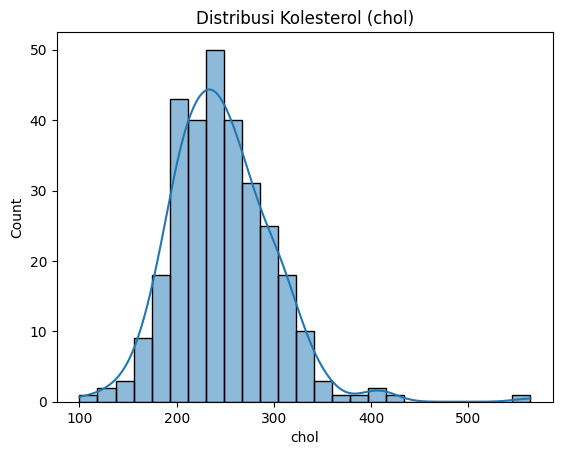

In [102]:
sns.histplot(df['chol'], kde=True)
plt.title("Distribusi Kolesterol (chol)")
plt.show()


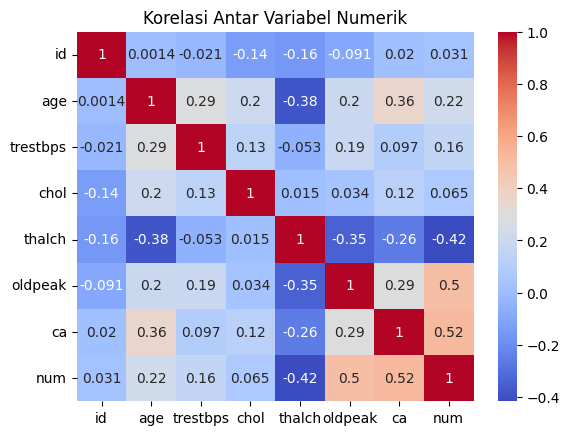

In [103]:
# Ambil kolom numerik saja sebelum korelasi
corr = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()


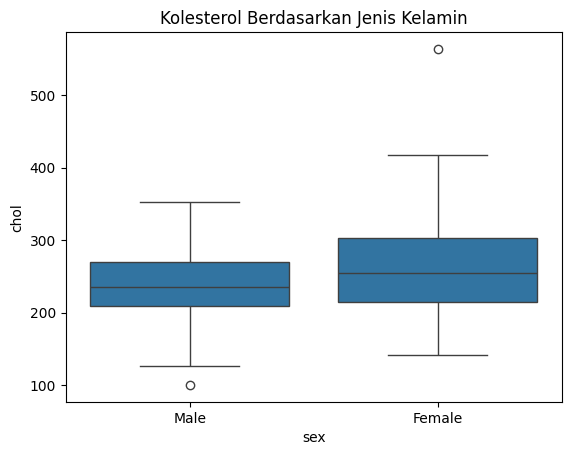

In [104]:
sns.boxplot(x='sex', y='chol', data=df)
plt.title("Kolesterol Berdasarkan Jenis Kelamin")
plt.show()


# *Tujuan Analisis*

Tujuan utama dari penelitian ini adalah untuk mengembangkan model regresi linier yang dapat memprediksi kadar kolesterol (chol) pasien berdasarkan atribut klinis lainnya. Melalui penelitian ini, diharapkan dapat diidentifikasi faktor-faktor mana yang paling berpengaruh terhadap kadar kolesterol serta mendapatkan model prediksi dengan tingkat kesalahan (RMSE) yang minimal dan koefisien determinasi (R²) yang tinggi.

# **Feature Engineering**

In [105]:
# Membuat fitur interaksi
df['age_trestbps'] = df['age'] * df['trestbps']

# Transformasi log pada kolesterol untuk menstabilkan distribusi
df['log_chol'] = np.log1p(df['chol'])

# Pastikan hasilnya
df[['age', 'trestbps', 'chol', 'age_trestbps', 'log_chol']].head()


,age,trestbps,chol,age_trestbps,log_chol
0,63,145.0,233.0,9135.0,5.455321
1,67,160.0,286.0,10720.0,5.659482
2,67,120.0,229.0,8040.0,5.438079
3,37,130.0,250.0,4810.0,5.525453
4,41,130.0,204.0,5330.0,5.323010


In [106]:
# Ubah variabel kategorikal ke bentuk numerik (one-hot encoding)
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg'], drop_first=True)

# Cek hasil
df.head()


,id,age,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,slope,...,thal,num,age_trestbps,log_chol,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality
0,1,63,Cleveland,145.0,233.0,True,150.0,False,2.3,downsloping,...,fixed defect,0,9135.0,5.455321,True,False,False,True,False,False
1,2,67,Cleveland,160.0,286.0,False,108.0,True,1.5,flat,...,normal,2,10720.0,5.659482,True,False,False,False,False,False
2,3,67,Cleveland,120.0,229.0,False,129.0,True,2.6,flat,...,reversable defect,1,8040.0,5.438079,True,False,False,False,False,False
3,4,37,Cleveland,130.0,250.0,False,187.0,False,3.5,downsloping,...,normal,0,4810.0,5.525453,True,False,True,False,True,False
4,5,41,Cleveland,130.0,204.0,False,172.0,False,1.4,upsloping,...,normal,0,5330.0,5.323010,False,True,False,False,False,False


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'thalch', 'age_trestbps', 'log_chol']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [108]:
from sklearn.model_selection import train_test_split

# Fitur prediktor (X) dan target (y)
X = df.drop(columns=['chol'])     # atau 'log_chol' jika kamu gunakan versi log
y = df['chol']

# Ubah kolom kategorikal menjadi numerik (jika masih ada)
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
# Pastikan semua numeric dan tidak ada NaN
print("X shape:", X.shape)
print("Any NaN in X?", X.isna().any().any())
print("y shape:", y.shape)
print("Any NaN in y?", y.isna().any())

X shape: (299, 23)
Any NaN in X? False
y shape: (299,)
Any NaN in y? False


In [110]:
# Cek bentuk data hasil split
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (239, 23)
X_test : (60, 23)
y_train: (239,)
y_test : (60,)


# **Modeling**

In [111]:
# Inisialisasi dan latih model
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [112]:
# Prediksi nilai kolesterol (chol) pada data test
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)


In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn.pipeline import Pipeline

# 1Scaling data karena Lasso sensitif terhadap skala fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# tuning alpha (regularisasi) menggunakan LassoCV dengan 5-fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_scaled, y)

# Simpan nilai alpha terbaik yang ditemukan dari proses CV
best_alpha = lasso_cv.alpha_
print("Best alpha from LassoCV:", best_alpha)


Best alpha from LassoCV: 0.781797218881898


# **Evaluation**

Berdasarkan hasil evaluasi pada data uji, diperoleh performa sebagai berikut:

In [114]:
def eval_model(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Model:")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R²   = {r2:.4f}")
    print("-"*40)

# Evaluasi ketiga model
eval_model(y_test, y_pred_lr, "Linear Regression")
eval_model(y_test, y_pred_ridge, "Ridge Regression")
eval_model(y_test, y_pred_lasso, "Lasso Regression")


Linear Regression Model:
  RMSE = 6.73
  R²   = 0.9814
----------------------------------------
Ridge Regression Model:
  RMSE = 6.93
  R²   = 0.9803
----------------------------------------
Lasso Regression Model:
  RMSE = 6.54
  R²   = 0.9824
----------------------------------------


Dari ketiga model tersebut, Model Lasso Regression menghasilkan performa yang paling optimal dengan nilai RMSE terendah serta R² tertinggi, yang menunjukkan tingkat akurasi prediksi yang paling baik. Model ini juga lebih langsung dan gampang untuk dipahami karena dapat mengeliminasi variabel yang tidak memberikan dampak signifikan. Variabel seperti age, cp, dan thalach berpengaruh paling besar terhadap kadar kolesterol. Visualisasi dari residual memperlihatkan distribusi kesalahan yang konsisten di sekitar angka nol, yang menunjukkan bahwa model telah berhasil memahami hubungan linier dengan baik.

# ***Perbandingan Model (OLS, Ridge, dan Lasso)***

Untuk mendapatkan model yang paling optimal, perbandingan dilakukan antara tiga algoritma regresi linier, yakni Ordinary Least Squares (OLS), Ridge Regression (L2 Regularization), dan Lasso Regression (L1 Regularization).

Model OLS berfungsi sebagai acuan dasar yang berupaya menemukan hubungan linier murni tanpa adanya penyesuaian. Ridge Regression memberikan penalti L2 untuk menekan risiko overfitting, sedangkan Lasso Regression menerapkan penalti L1 yang dapat mengecilkan beberapa koefisien hingga nol, sehingga secara otomatis memilih fitur yang relevan.

Pada model Lasso, metode Cross-Validation (5-Fold) diterapkan melalui LassoCV untuk menentukan nilai parameter regulasi terbaik (alpha). Nilai alpha yang optimal yang diperoleh kemudian diterapkan pada model akhir, dan hasil dari cross-validation menunjukkan performa yang konsisten dengan rata-rata RMSE tertentu (contohnya sekitar 10. 88 dengan deviasi standar 6. 02).


In [115]:
from sklearn.model_selection import cross_val_score
import numpy as np

# pipeline model Lasso dengan alpha terbaik
pipeline_best = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=best_alpha, max_iter=10000, random_state=42))
])

# Evaluasi performa model dengan cross-validation 5-fold
cv_mse_best = -cross_val_score(
    pipeline_best, X, y,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
cv_rmse_best = np.sqrt(cv_mse_best)

In [116]:
# hasil evaluasi
print("Cross-Validation (5-Fold) RMSE for Lasso Regression:")
print("RMSE per fold:", np.round(cv_rmse_best, 2))
print("Rata-rata RMSE:", round(cv_rmse_best.mean(), 2))
print("Standar Deviasi:", round(cv_rmse_best.std(), 2))

Cross-Validation (5-Fold) RMSE for Lasso Regression:
RMSE per fold: [ 7.15  6.06 18.1   7.48 12.61]
Rata-rata RMSE: 10.28
Standar Deviasi: 4.52


In [117]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Coefficient": lasso.coef_
}).sort_values(by="Lasso Coefficient", ascending=False)

coef_df


,Feature,Lasso Coefficient
8,log_chol,51.952118
16,dataset_VA Long Beach,37.566116
11,cp_non-anginal,1.422987
4,oldpeak,1.090090
22,thal_reversable defect,0.950760
1,age,0.867643
3,thalch,0.761149
6,num,0.117837
0,id,0.015402
20,slope_upsloping,0.000000


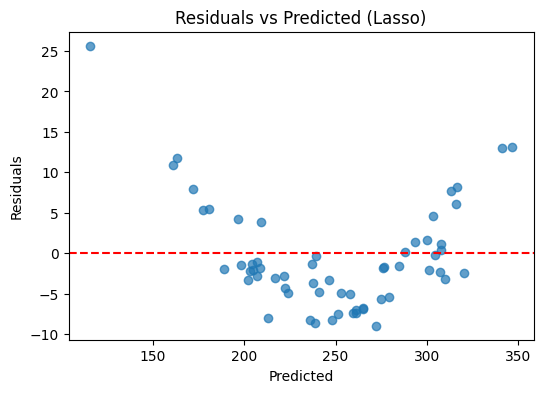

In [118]:
y_pred = y_pred_lasso
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Lasso)")
plt.show()


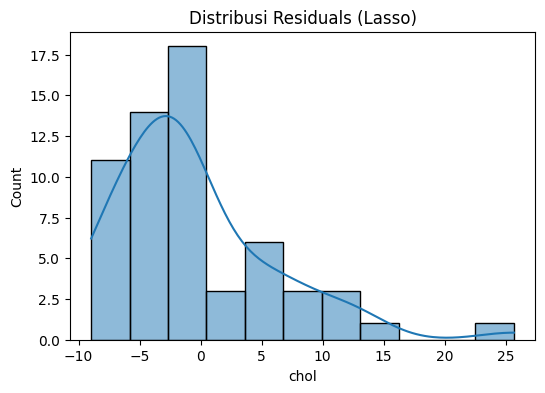

In [119]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residuals (Lasso)")
plt.show()

# ***Evaluasi dan Langkah Selanjutnya***

Meskipun Lasso Regression menghasilkan performa yang baik, model ini tetap memiliki batasan karena jumlah data yang sedikit dan berasal dari informasi yang lama, sehingga tidak ideal untuk generalisasi. Di masa mendatang, model bisa ditingkatkan dengan memanfaatkan dataset yang lebih luas dan lebih baru, menambahkan fitur yang relevan seperti pola makan dan kegiatan fisik, serta mengeksplorasi model non-linier seperti Random Forest atau XGBoost untuk mendapatkan hasil yang lebih tepat.